
<b><font color = "darkblue" size = 6>UNIVERSITY ADMISSION PREDICTION</font></b><br>


<b> ~ ~ EXPLORING DATA ~ ~ <b>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
%matplotlib inline

<b>Context</b>

This dataset is created for prediction of Graduate Admissions from an Indian perspective.

<b>Content</b>

The dataset contains several parameters which are considered important during the application for Masters Programs. 
The parameters included are :

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )

In [2]:
#fetching data 
data = pd.read_csv('Admission_Predict.csv')
data.columns = ['S_Number', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP','LOR','CGPA','Research','Chance']

In [3]:
#printing first 10 rows in the data
data.head(10)

,S_Number,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
#printing last 10 rows in the data
data.tail(10)

,S_Number,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance
390,391,314,102,2,2.0,2.5,8.24,0,0.64
391,392,318,106,3,2.0,3.0,8.65,0,0.71
392,393,326,112,4,4.0,3.5,9.12,1,0.84
393,394,317,104,2,3.0,3.0,8.76,0,0.77
394,395,329,111,4,4.5,4.0,9.23,1,0.89
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
#printing the shape of the data i.e. 400 rows and 9 columns
data.shape

(400, 9)

In [6]:
#describing the data
data.describe()

,S_Number,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
#describing the datatype of the columns
data.dtypes

S_Number               int64
GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance               float64
dtype: object

In [8]:
#checking the missing values
print('Missing values in columns:')
data.isnull().sum()

Missing values in columns:


S_Number             0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance               0
dtype: int64

In [9]:
#grouping the columns on the basis of University_Rating
data.groupby('University_Rating').mean()

,S_Number,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,Chance
University_Rating,,,,,,,,
1,233.807692,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,214.813084,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,204.165414,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,199.594595,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,153.533333,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


<b> ~ ~ VISUALIZING DATA ~ ~ </b>

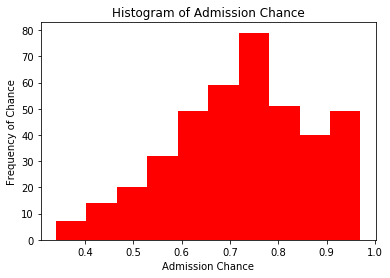

In [10]:
#histogram of frequency of Chance to show distributions of variables
plt.figure(figsize=(6,4))
plt.hist(data['Chance'],bins=10,color="red")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

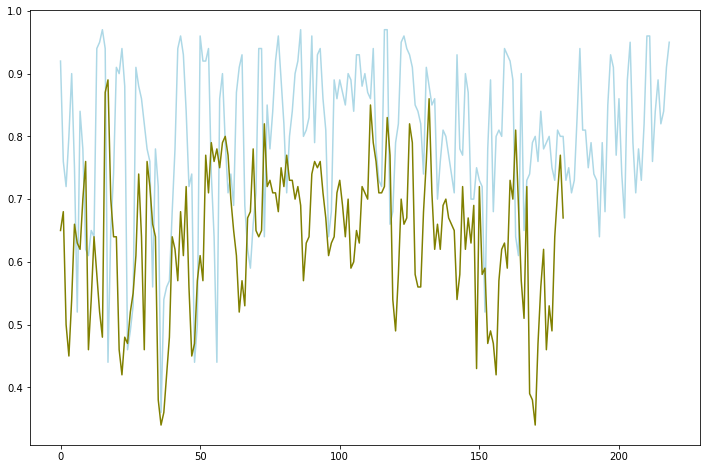

In [11]:
#Research vs Chance
plt.figure(figsize=(12,8))
plt.plot(range(len(data[data['Research']==1])), data[data['Research']==1]['Chance'], color='lightblue')
plt.plot(range(len(data[data['Research']==0])), data[data['Research']==0]['Chance'], color='olive')
plt.show() 

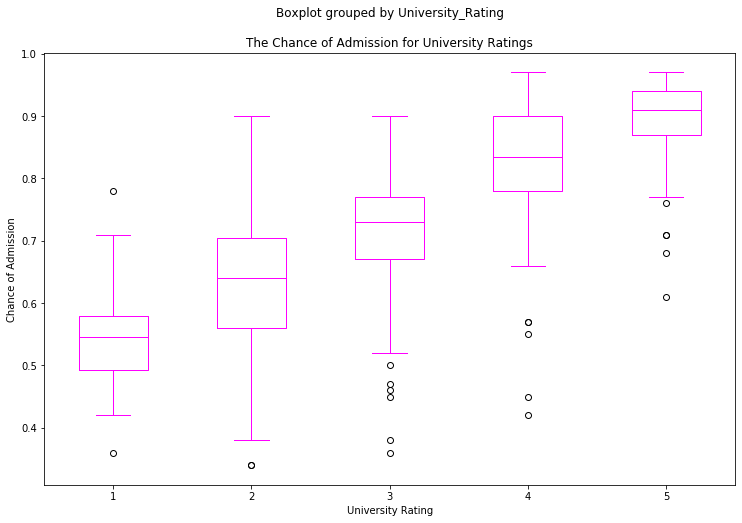

In [12]:
#boxplot of Chance vs University_Rating
data.boxplot(column='Chance',by='University_Rating',grid=False,figsize=(12,8),color='magenta')
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show() 

Text(0.5, 0.98, 'CGPA VS (TOEFL Score & GRE Score)')

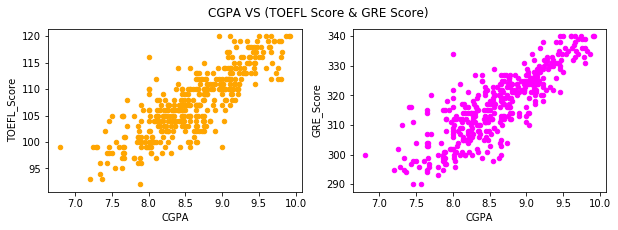

In [13]:
#scatter plot of CGPA vc TOEFL_Score and GRE_Score
fig, ax = plt.subplots(1,2,figsize=(10,3))
data.plot(kind='scatter', x='CGPA', y='TOEFL_Score',ax=ax[0], color='orange')
data.plot(kind='scatter', x='CGPA', y='GRE_Score',ax=ax[1], color='magenta')
plt.suptitle('CGPA VS (TOEFL Score & GRE Score)')

Text(0, 0.5, 'Students count')

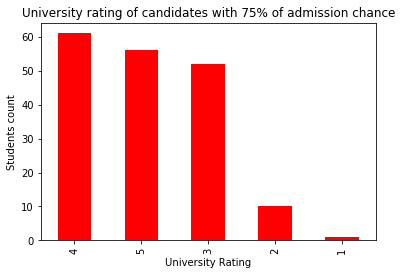

In [14]:
#bargraph of University rating of candidates with 75% of admission chance
data_count = data[data['Chance'] >=0.75]['University_Rating'].value_counts()
data_count.plot(kind='bar', color='red')
plt.title('University rating of candidates with 75% of admission chance')
plt.xlabel('University Rating')
plt.ylabel('Students count')

<b> ~ ~ CLEANING DATA ~ ~ </b>

In [15]:
#dropping S_Number column
data2=data.drop(columns ='S_Number') 
data2.head(10) 

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


<b><font color = "orange" size = 6> Using Gradient Descent </font></b>

In [16]:
#normalizing the data using: normalized_data=data-data.min()/data.max()-data.min()
data3=data2
data3['GRE_Score'] = (data3['GRE_Score']-data3['GRE_Score'].min())/(data3['GRE_Score'].max()-data3['GRE_Score'].min())
data3['TOEFL_Score'] = round((data3['TOEFL_Score']-data3['TOEFL_Score'].min())/(data3['TOEFL_Score'].max()-data3['TOEFL_Score'].min()),3)
data3['University_Rating'] = (data3['University_Rating']-data3['University_Rating'].min())/(data3['University_Rating'].max()-data3['University_Rating'].min())
data3['SOP'] = (data3['SOP']-data3['SOP'].min())/(data3['SOP'].max()-data3['SOP'].min())
data3['LOR'] = (data3['LOR']-data3['LOR'].min())/(data3['LOR'].max()-data3['LOR'].min())
data3['CGPA'] = round((data3['CGPA']-data3['CGPA'].min())/(data3['CGPA'].max()-data3['CGPA'].min()),3)
data3.head(10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance
0,0.94,0.929,0.75,0.875,0.875,0.913,1,0.92
1,0.68,0.536,0.75,0.750,0.875,0.663,1,0.76
2,0.52,0.429,0.50,0.500,0.625,0.385,1,0.72
3,0.64,0.643,0.50,0.625,0.375,0.599,1,0.80
4,0.48,0.393,0.25,0.250,0.500,0.452,0,0.65
5,0.80,0.821,1.00,0.875,0.500,0.814,1,0.90
6,0.62,0.607,0.50,0.500,0.750,0.449,1,0.75
7,0.36,0.321,0.25,0.500,0.750,0.353,0,0.68
8,0.24,0.357,0.00,0.250,0.125,0.385,0,0.50
9,0.66,0.571,0.50,0.625,0.500,0.577,0,0.45


In [17]:
#assigning Chance to dependent_variable
dependent_variable = 'Chance'

In [18]:
#assigning column names to independent_varibles
independent_variables=data3.columns.tolist()

In [19]:
#removing the column name of dependent variable from independent_variables
independent_variables.remove(dependent_variable)

In [20]:
#printing the independent_variables column names
print(independent_variables)

['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research']


In [21]:
#printing the first 10 rows of independent_variables
X = data3[independent_variables]
X.head(10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,0.94,0.929,0.75,0.875,0.875,0.913,1
1,0.68,0.536,0.75,0.750,0.875,0.663,1
2,0.52,0.429,0.50,0.500,0.625,0.385,1
3,0.64,0.643,0.50,0.625,0.375,0.599,1
4,0.48,0.393,0.25,0.250,0.500,0.452,0
5,0.80,0.821,1.00,0.875,0.500,0.814,1
6,0.62,0.607,0.50,0.500,0.750,0.449,1
7,0.36,0.321,0.25,0.500,0.750,0.353,0
8,0.24,0.357,0.00,0.250,0.125,0.385,0
9,0.66,0.571,0.50,0.625,0.500,0.577,0


In [22]:
#printing the first 10 rows of dependent_variable
Y = data3[dependent_variable]
Y.head(10) 

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
5    0.90
6    0.75
7    0.68
8    0.50
9    0.45
Name: Chance, dtype: float64

In [23]:
#splitting the data as train and test data
#test data size 0.2 i.e. 80
#and the rest 0.8 i.e. 320 as train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
#printing first 10 rows of X_train
X_train[0:10]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
336,0.58,0.643,0.50,0.500,0.375,0.638,0
64,0.70,0.679,0.50,0.500,0.625,0.609,0
55,0.60,0.393,0.50,0.500,0.500,0.288,0
106,0.78,0.679,0.75,0.875,0.875,0.763,1
300,0.38,0.500,0.25,0.375,0.375,0.385,0
229,0.68,0.679,0.75,0.500,0.500,0.708,1
122,0.40,0.500,0.75,0.125,0.375,0.500,0
373,0.62,0.607,0.50,0.500,0.500,0.558,1
395,0.68,0.643,0.50,0.625,0.625,0.718,1
325,0.72,0.857,0.50,0.625,0.750,0.750,1


In [25]:
#printing first 10 rows of y_train
y_train[0:10]

336    0.72
64     0.52
55     0.64
106    0.87
300    0.62
229    0.82
122    0.57
373    0.79
395    0.82
325    0.81
Name: Chance, dtype: float64

In [26]:
#function calculating the cost mean square error
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [27]:
#function calculating the gradient descent
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m= len(Y)

    for iteration in range(iterations):
     #print(iteration)
     #hypothesis Values
        h = X.dot(B) 
         #difference b/w Hypothesis and Actual Y
        loss = h - Y
         #gradient Calculation
        gradient = X.T.dot(loss) / m
         #changing Values of B using Gradient
        B = B - alpha * gradient
         #new Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        if(iteration<20):
            print(cost)
    return B, cost_history

In [28]:
#initializing the coefficients(β0, β1,…, βn) and training the model
B = np.zeros(X_train.shape[1]) #initially B=[0,0,0,0,0,0,0]
alpha = 0.005
iter_ = 2000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

0.26763053972982803
0.2610279215103131
0.2545970840360746
0.24833355434137613
0.2422329759360177
0.23629110577231827
0.23050381129107808
0.22486706754446448
0.2193769543938168
0.21402965378042121
0.2088214470673538
0.20374871245054244
0.19880792243724366
0.19399564139018097
0.1893085231356328
0.18474330863380634
0.1802968237098742
0.17596597684409523
0.17174775701948017
0.1676392316255042


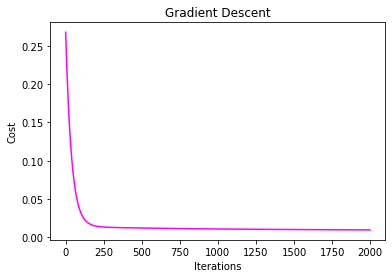

In [29]:
#plotting the graph for gradient descent
plt.figure()
plt.plot(list(range(0, 2000)), cost_history, 'k-',color='magenta')
plt.title('Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<b><font color = "orange" size = 6 >Using ordinary least square regression </font></b>

In [30]:
#declaring a new class OrdinaryLeastSquares
class OrdinaryLeastSquares(object):
    
    #to see the coefficients of the regression model
    def __init__(self):
        self.coefficients = []
        
    #to train the model and calling helper functions   
    def fit(self, X, y):
        if len(X.shape) == 1: X=self._reshape_x(X)
            
        X = self._concatenate_ones(X)
        self.coefficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
        
    #to validate the model and make new predictions
    def predict(self,entry):
        b0= self.coefficients[0]
        other_betas = self.coefficients[1:]
        prediction = b0
        
        #to iterate over new X and all coefficients at the same time
        for xi,bi in zip(entry,other_betas):prediction +=(bi*xi)
        return prediction
    
    #reshape features (X) into two dimensions
    def _reshape_x(self,X):
        return X.reshape(-1,1)
    
    #concatenate a vector of ones to the feature matrix
    def _concatenate_ones(self,X):
        ones = np.ones(shape = X.shape[0]).reshape(-1,1)
        return np.concatenate((ones,X),1)

In [31]:
#construct feature matrix and target vector 
X = data3.drop('Chance', axis=1).values
Y=data3['Chance'].values

In [32]:
#make an instance of OrdinaryLeastSquares
model = OrdinaryLeastSquares()

In [33]:
#fitting X and Y in our model
model.fit(X,Y) 

In [34]:
#accessing the coefficients after training
model.coefficients

array([ 0.34658029,  0.08692551,  0.08186655,  0.02285906, -0.01314848,
        0.08939813,  0.37087764,  0.02450132])

In [35]:
#make prediction for the first 10 rows of X
print('Prediction for first 10 rows:')
for i in range(0,10):
    print(model.predict(X[i]))

Prediction for first 10 rows:
0.9513196368007552
0.8054695996052197
0.6549206344921347
0.7382458605113912
0.6352414904100925
0.865782058138416
0.713096366482641
0.6012615648813685
0.5473443067649897
0.7126041198145082


In [36]:
#make predictions for every row in X
Y_preds = []
for row in X: 
    Y_preds.append(model.predict(row))

In [37]:
#printing actual and predicted values for first 10 values
output=pd.DataFrame({
    'Actual':Y,
    'Predicted':np.ravel(Y_preds)
})
output.head(10)

,Actual,Predicted
0,0.92,0.951320
1,0.76,0.805470
2,0.72,0.654921
3,0.80,0.738246
4,0.65,0.635241
5,0.90,0.865782
6,0.75,0.713096
7,0.68,0.601262
8,0.50,0.547344
9,0.45,0.712604


Text(0, 0.5, 'Accuracy')

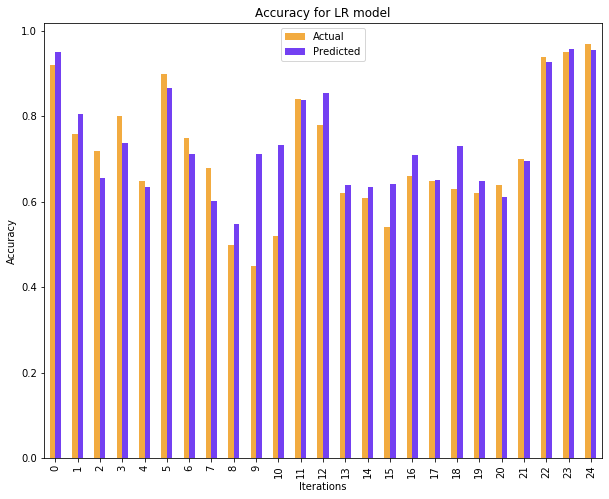

In [38]:
#plotting predicted and actual values for first 25 instances 
fig=output.head(25)
color1=['#f2ab40','#7340f2']
fig.plot(kind='bar',figsize=(10,8), color=color1)
plt.title('Accuracy for LR model')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

In [39]:
#function to calculate the accuracy of the model
def accuracy_metric(actual, predicted):
    error = 0
    for i in range(len(actual)):
        error=error+(abs(actual[i]-predicted[i])/actual[i])
    return 100 - error * 100.0/len(actual)

In [40]:
#calculating the accuracy for our data using LR
accuracy = accuracy_metric(output['Actual'], output['Predicted'])
print("The accuracy of LR is: %.2f percent!" %accuracy )

The accuracy of LR is: 92.71 percent!


<b><font color = "orange" size = 6 >Using KNN </font></b>

In [41]:
#create the scaler leaving parameters as default
scaler = StandardScaler()

In [42]:
#Fit the scaler passing the training data
train_scaled = scaler.fit_transform(X_train)

In [43]:
#Transform our test data with the same fitted scaler
test_scaled = scaler.transform(X_test)

In [44]:
#create an KNN model
model = KNeighborsRegressor()

In [45]:
#Train it with our scaled training data and target values
model.fit(train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [46]:
#calculating mse and mae for training data
mse = mean_squared_error(y_train, model.predict(train_scaled))
mae = mean_absolute_error(y_train, model.predict(train_scaled))
print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))

mse =  0.0029684125  & mae =  0.03861875  & rmse =  0.05448313959382297


In [47]:
#calculating mse and mae for predicted data
test_mse = mean_squared_error(y_test, model.predict(test_scaled))
test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

mse =  0.005340149999999999  & mae =  0.050225  & rmse =  0.07307632995710717


In [48]:
#calculating the accuracy for our data using KNN
accuracyknn=100-sqrt(test_mse)
print("The accuracy of KNN is: %.2f percent!" %accuracyknn)

The accuracy of KNN is: 99.93 percent!


Text(0, 0.5, 'Accuracy %')

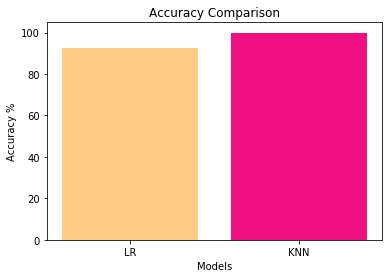

In [49]:
#comparing accuracies
compare = [accuracy,accuracyknn]
models = ['LR', 'KNN']
color1=['#ffcc88','#f00f80']
plt.bar(models, compare, align='center', color=color1)
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy %')